# Customer Segmentation Analysis

Customer segmentation is the process by which customers are divided into groups based on common characteristics


In order to solve a customer segmentation  problem, a Customer behavior Analysis needs to be carried out. Customer behavior Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.
For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


**Factors for segmentation for a business to consumer marketing company:**
- Demographic: Age, Gender, Education, Ethnicity, Income, Employment, hobbies, etc.
- Recency, Frequency, and Monetary: Time period of the last transaction, the frequency with which the customer transacts, and the total monetary value of trade.
- Behavioral: Previous purchasing behavior, brand preferences, life events, etc.
- Psychographic: Beliefs, personality, lifestyle, personal interest, motivation, priorities, etc.
- Geographical: Country, zip code, climatic conditions, urban/rural areal differentiation, accessibility to markets, etc.

## Business Problem
A United Kingdom (UK)-based online retail shop wants to maximize sales, so it decides to study its customers' behavior and segment them appropriately to improve target marketing.

## Objective

This analysis will be focused on three main objectives:
- look at customer behavior and performance (Cohort Analysis)
- get the RFM values and group customers based on them
- make clusters with K-means algorithms.

## Loading libraries and dataset

**importing libraries**

In [1]:
# data preparation 
import numpy as np 
import pandas as pd 
from datetime import date
import datetime as dt

#data  Visualization
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import matplotlib.ticker as mticker


#model training
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer


import warnings
warnings.filterwarnings("ignore")

**Data collection**

The data is a  transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based retail company.

In [ ]:
# importing data
from google.colab import files
uploaded = files.upload()

In [45]:
# reading dataset into a dataframe
data = pd.read_csv('data.csv',encoding= 'unicode_escape',parse_dates = ['InvoiceDate'],\
                   dtype={'CustomerID': str})

## Exploratory Data Analysis 

**Taking a look at the dataset**

In [46]:
print("Number of records:", len(data))
data.head()

Number of records: 541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


 **looking at data summary**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Dataset contains the following:
- 541909 records
- 8 features
- float, int, object, and datetime data types
- there are missing values in CustomerID and Description

**Checking missing records**

In [5]:
def missing_percentage(df):
    """
     This function takes a DataFrame(df) as input and returns two columns,
     total missing values and total missing values percentage
     
     """
    
    total = df.isnull().sum().sort_values(ascending = False)\
    [df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)\
    [round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [6]:
missing_percentage(data)

,Total,Percent
CustomerID,135080,24.93
Description,1454,0.27


**checking unique values for each feature**

In [7]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

**checking for duplicates**

In [8]:
data.duplicated().sum()

5268

**Basic data statistics**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


- The negative values in the Quantity and UnitPrice columns are perceived to be returned goods or orders cancelled.
- Theres  high variation of values in the quantity, unitprice (std is greater than the mean)


In [10]:
data.describe(include = 'object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
CustomerID,406829,4372,17841,7983
Country,541909,38,United Kingdom,495478


- The customer with ID "17841" bought the highest number of goods, frequently visiting the store 7983 times
- The "White Hanging heart-heart T-light holder is the most bought product.
- Most customers were from the UK

**Checking cancelled orders/ returned goods**

In [11]:
x = data['InvoiceNo'].str.contains('C',regex=True)
x.fillna(0, inplace=True)
x = x.astype(int)
x1 = x.value_counts()[1]
x2 = x.shape[0]

In [12]:
print('percentage of orders canceled: {}/{} ({:.2f}%) '.format(x1, x2, x1/x2*100))

percentage of orders canceled: 9288/541909 (1.71%) 


9288 goods were either returned or the orders were cancelled. This is less than 2% of the total transaction.

### Exploring categorical variables

In [13]:
def check_cat(data):
    """
    This function checks the number of labels within a categorical variable
    
    INPUT:
    data:DataFrame, dataset
    """
    for col in data.select_dtypes(include=['object']):
        print('Unique values')
        print('-------------------------')
        print(data[col].unique())
        print()
        print('Unique value counts')
        print('-------------------------')
        print(data[col].value_counts(), '\n')
        print()


In [14]:
# checking cat features
check_cat(data)

Unique values
-------------------------
['536365' '536366' '536367' ... '581585' '581586' '581587']

Unique value counts
-------------------------
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C573271       1
570130        1
540100        1
545567        1
537018        1
Name: InvoiceNo, Length: 25900, dtype: int64 


Unique values
-------------------------
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']

Unique value counts
-------------------------
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85034b       1
20738        1
23628        1
35600A       1
84612B       1
Name: StockCode, Length: 4070, dtype: int64 


Unique values
-------------------------
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Unique value counts
-------------------------
WHITE HANGI

### Visualization data distribution

**Looking at the distribution of numerical features**

In [15]:
def plotting_chart(df, feature):
    """
    This function plots the distribution of the numerical variables
    
    INPUT:
    df:DataFrame,dataset
    feature: float or int,numerical features
    
    """
    

    #setting style
    style.use('fivethirtyeight')
    
    ## Creating a customized chart. 
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    ## Customizing the Box Plot. 
    ax2 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax2.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax2 );

**Distribution of quantity**

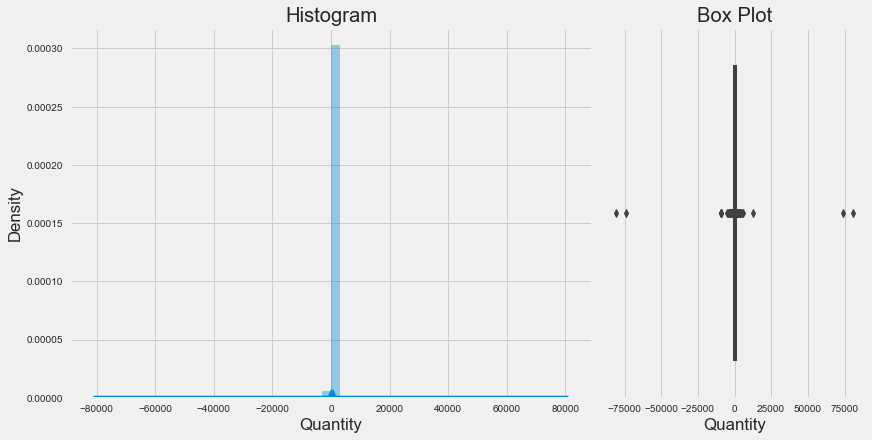

In [16]:
plotting_chart(data, 'Quantity')

- This distribution is not normal
- There are negative values which may indicate incorrect recording or goods returned

**Distribution of unitprice**

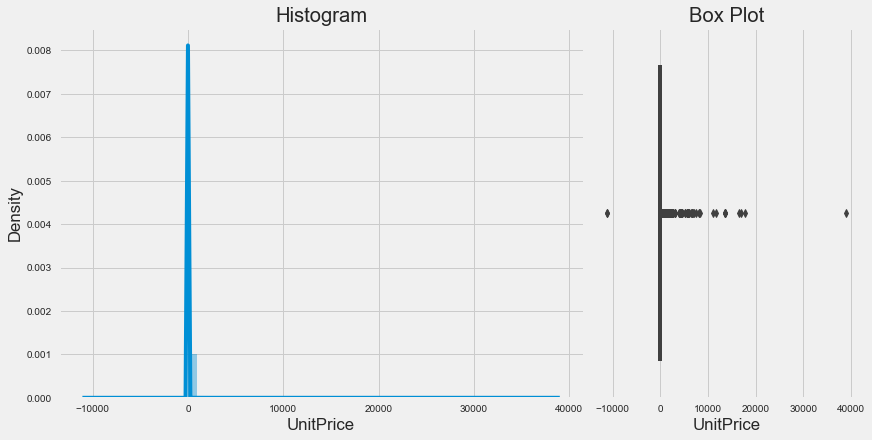

In [17]:
plotting_chart(data, 'UnitPrice')

**Visualizing outliers profoundly**

In [18]:
#Plotting outliers
num_list=list(set(data._get_numeric_data().columns))
for col in num_list:
    
    upper_limit = int(data[col].mean() + 3*data[col].std())
    lower_limit = int(data[col].mean() - 3*data[col].std())
    data[col] = np.where(data[col]>upper_limit,upper_limit,np.where(data[col]<lower_limit,lower_limit,data[col]))



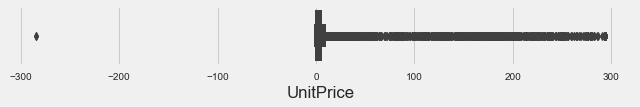

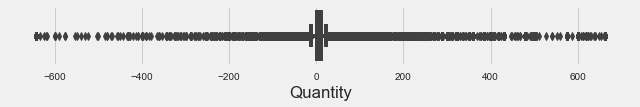

In [19]:
# plotting a boxplot
for col in num_list:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=data[num_list],x=data[col],orient='h')

**Looking at Quantities sold over the 13 month period**

In [20]:
products_sold = pd.DataFrame(data.groupby('InvoiceDate',sort=False).agg({'Quantity':'sum'}))

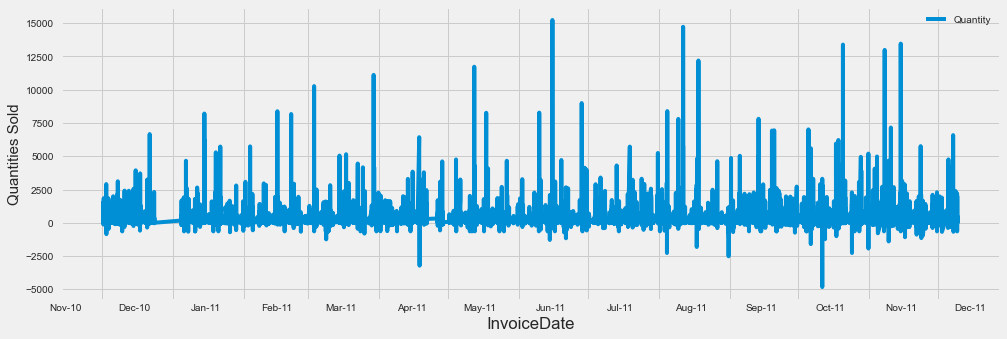

In [21]:
plt.style.use('fivethirtyeight')
fig = products_sold.plot(figsize=(15,6))
plt.ylabel("Quantities Sold",{'fontsize':15})
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b-%y"))

- June 2011 recorded the highest quantities sold
- Most goods were returned in the month of october 2011
- Looks like some goods were returned at least every month

**Looking at quantities sold in the various countries**

In [22]:
countries = pd.DataFrame(data.groupby('Country',sort=False).agg({'Quantity':'sum'}))

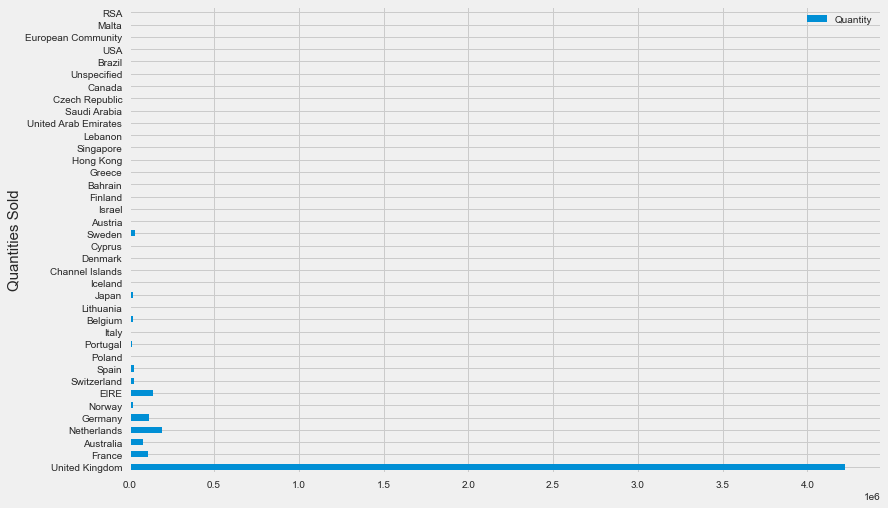

In [23]:
plt.style.use('fivethirtyeight')
fig = countries.plot(kind='barh', figsize=(12,8))
plt.ylabel("Quantities Sold",{'fontsize':15})
plt.show()

Most quantities were sold in the UK.

## Data Preparation 

### Data Cleaning

#### Handling missing data

with the type of records missing, I will just go ahead and drop all rows that have missing records

In [47]:
data = data.dropna(subset=['CustomerID'])
print("Total records remaining :", len(data))

Total records remaining : 406829


#### Handling duplicates

In [48]:
data = data.drop_duplicates()

In [49]:
data.duplicated().sum()

0

#### Handling cancelled orders/ returned goods
removing records with negative quantities and prices

ie. goods that might have been returned.

In [50]:
df=data[(data['Quantity']>0) & (data['UnitPrice']>0)]
df.describe() 

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


negative records have been successfully removed

## Cohort analysis

A cohort is a set of users who share similar characteristics over time. Cohort analysis is a type of customer behavior analysis that groups the users into mutually exclusive groups and their behavior is measured over time.

For this particular project, Time cohorts will be created and customers who remain active during particular cohorts over a period of time that they transact over, will be looked at.


### Year and Month of a single invoice

Creating a  function that will parse the date time based cohort:  1 day of month and then
create invoice day column based on month, day and year in InvoiceDate

In [51]:
df['InvoiceDay'] = df.InvoiceDate.apply(lambda x: dt.datetime(x.year, x.month,1))
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01


### Year and month of a customers first purchase

In [52]:
# grouping this transaction period by customers
groups = df.groupby('CustomerID')['InvoiceDay']

# Assigning a minimum InvoiceMonth value to the dataset ie first time a customer made a transaction with the company
df['CohortFirstTime'] = groups.transform('min')

In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortFirstTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01


### Calculating time offset in Month as Cohort Index

In [54]:
def get_date(df,X):
    """
    This function extracts the year,month and day from a given date.
    
    Input: Pandas Dataframe,a date column
    
    Output: Returns year, month and day in integers
    
    """   
    year = df[X].dt.year
    month = df[X].dt.month
    day = df[X].dt.day
    return year, month , day 

In [55]:
# extracting year, month and day from the given dates
invoice_year,invoice_month,_ = get_date(df,'InvoiceDay')
cohort_year,cohort_month,_ = get_date(df,'CohortFirstTime')

# getting the difference
year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

# setting index
df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortFirstTime,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1


### Monthly active users

In [57]:
#Counting monthly active customers from each cohort
groups = df.groupby(['CohortFirstTime', 'CohortIndex'])
cohort_data = groups['CustomerID'].apply(pd.Series.nunique)


# Returning number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortFirstTime',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortFirstTime,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculating retention rate

The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.


In [58]:
cohort_size = cohort_counts.iloc[:,0]
retention_rate = cohort_counts.divide(cohort_size,axis=0) 
retention_rate.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortFirstTime,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The company was only able to retain 26.6 percent of their first cohort customers after a year.

**Visualizing with a heatmap**

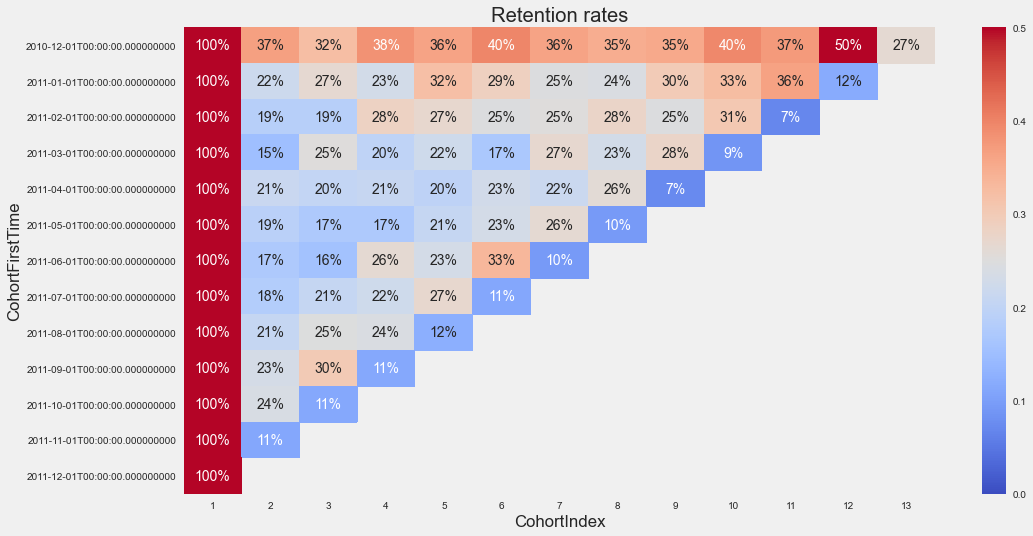

In [59]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention_rate,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5, cmap='coolwarm')
plt.show()

### Average quantity per each cohort

In [60]:
#grouping by cohort first time and index
quantity_groups = df.groupby(['CohortFirstTime', 'CohortIndex'])

# getting the average quantity
cohort_data = quantity_groups['Quantity'].mean()
cohort_data = cohort_data.reset_index()


# getting the average quantity per each cohort
average_quantity = cohort_data.pivot(index='CohortFirstTime',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

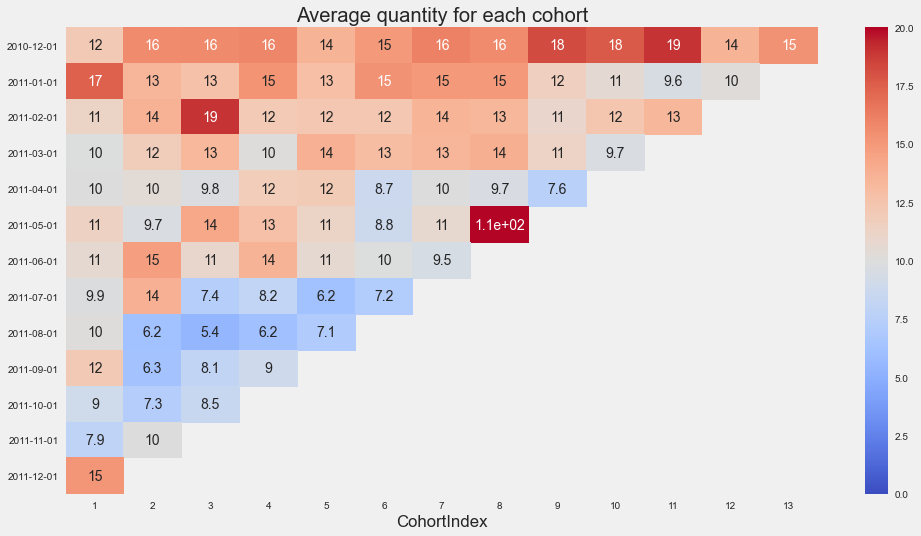

In [61]:
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20, cmap='coolwarm')
plt.show()

## Feature Engineering 



### Understanding purchase patterns using RFM analysis


To fully appreciate customers’ spending and regulation, and then grouping them, the following points would be considered:
- Recency
  - How recently did a customer make a purchase?
- Frequency
  - How often does the customer purchase?
- Monetary 
  - How much do they spend?

The above metrics would be generated by the steps below respectively:

- Calculate the Recency of each customer by their latest transaction date.
- Calculate the Frequency of each customer by summing the number of invoices tagged to each customer.
- Calculate the Monetary Value of each customer by summing up their respective total spend.


The grouping process will be carried out by the steps below:

- Sort customers based on the  metrics above
- Break customers into a pre-defined number of groups of equal size
- Assign a label to each group

### Creating a new feature called Revenue

Unit price of the goods multiplied by the quantity of the sold goods.

In [62]:
  df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [63]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortFirstTime,CohortIndex,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34


### Getting recency value

The final day of the dataset is December 9th, 2011.  December 10th is set as the pining date and counting backward the number of days from the latest purchase for each customer, will be the recency value.

In [64]:
# print the time period
print('Min : {}, Max : {}'.format(min(df.InvoiceDate), max(df.InvoiceDate)))

Min : 2010-12-01 08:26:00, Max : 2011-12-09 12:50:00


In [65]:
# pin the last date
last_date = max(df.InvoiceDate) + dt.timedelta(1)

In [66]:
last_date

Timestamp('2011-12-10 12:50:00')

### Calculating RFM metrics

In [67]:
#get the number of days between hypothetical today and the last transaction
rfm = df.groupby(['CustomerID','Country']).agg({'InvoiceDate': lambda x : (last_date - x.max()).days,
                                      'InvoiceNo':'count','Revenue': 'sum'})

#Rename columns
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Revenue':'MonetaryValue'}
           ,inplace= True)
rfm.head()

,,Recency,Frequency,MonetaryValue
CustomerID,Country,,,
12346,United Kingdom,326,1,77183.60
12347,Iceland,2,182,4310.00
12348,Finland,75,31,1797.24
12349,Italy,19,73,1757.55
12350,Norway,310,17,334.40


### Creating RFM quartiles 

In [68]:
# create labels and assign them to tree percentile groups 
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 4, labels = r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(rfm.Frequency, q = 4, labels = f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm.MonetaryValue, q = 4, labels = m_labels)

Because recency means how much time has elapsed since a customer’s last order, the smaller the value is, the more engaged a customer to that brand. So its labels are in descending order.

In [69]:
# make a new column for group labels
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

# sum up the three columns
rfm['RFMSegment'] = rfm.apply(lambda x: (x['R']).astype(str) + (x['F']).astype(str) + (x['M']).astype(str), axis = 1)
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore
CustomerID,Country,,,,,,,,
12346,United Kingdom,326,1,77183.60,1,1,4,1.01.04.0,6
12347,Iceland,2,182,4310.00,4,4,4,4.04.04.0,12
12348,Finland,75,31,1797.24,2,2,4,2.02.04.0,8
12349,Italy,19,73,1757.55,3,3,4,3.03.04.0,10
12350,Norway,310,17,334.40,1,1,2,1.01.02.0,4


attached all three labels in one cell as RFM_Segment. In this way, what segment a customer belongs to can easily be checked. RFM_Score is the total sum of the three values which is the total score of a customer’s engagement or loyalty.

In [70]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4346 entries, ('12346', 'United Kingdom') to ('18287', 'United Kingdom')
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4346 non-null   int64   
 1   Frequency      4346 non-null   int64   
 2   MonetaryValue  4346 non-null   float64 
 3   R              4346 non-null   category
 4   F              4346 non-null   category
 5   M              4346 non-null   category
 6   RFMSegment     4346 non-null   object  
 7   RFMScore       4346 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 229.9+ KB


### Analyzing RFM segments

Looking at recent, frequent and customers willing to spend lots of money

In [71]:
# recent, frequent, and spends lots of money
star_customers = (rfm.loc[rfm['RFMScore'] == 9])

In [72]:
star_customers.describe()

,Recency,Frequency,MonetaryValue,RFMScore
count,413.000000,413.000000,413.000000,413.0
mean,45.929782,78.697337,1792.521143,9.0
std,50.445274,51.355915,8320.457414,0.0
min,1.000000,1.000000,271.190000,9.0
25%,19.000000,47.000000,732.070000,9.0
50%,30.000000,69.000000,1093.680000,9.0
75%,53.000000,95.000000,1562.400000,9.0
max,372.000000,521.000000,168472.500000,9.0


There are 413 star customers 

These customers are active and spend money on products consistently.

### Summary metrics per RFM Score

In [73]:
met_sum = rfm.groupby('RFMScore').agg({'Recency': 'mean','Frequency': 'mean',
                             'MonetaryValue': ['mean', 'count'] }).round(1)


In [74]:
met_sum.T

RFMScore                3      4      5      6      7      8       9       10  \
Recency       mean   261.3  177.2  153.2   96.0   79.7   64.7    45.9    32.5   
Frequency     mean     8.2   13.7   21.0   27.8   37.9   55.9    78.7   110.6   
MonetaryValue mean   158.0  238.7  366.7  816.7  758.7  987.3  1792.5  2057.4   
              count  382.0  385.0  524.0  458.0  461.0  460.0   413.0   425.0   

RFMScore                 11      12  
Recency       mean     21.3     7.2  
Frequency     mean    186.5   367.8  
MonetaryValue mean   4051.5  9284.9  
              count   388.0   450.0



### Grouping Customers using the RFM scores

Using RFM score to categorize customers into ‘Gold,’ ‘Silver,’ ‘Bronze,’.

where:
- Gold customers buy lots of goods and are active
- Silver customers a a bit price sensitive
- Bronze customers are more price sensitive and not axaclty active

In [75]:
def group_segment(df):
    if df['RFMScore'] > 9 :
        return 'Gold'
    elif (df['RFMScore'] >5) & (df['RFMScore'] <=9 ):
        return 'Silver'
    else:  
        return 'Bronze'

In [76]:
# group  customers
rfm['RFMLevel'] = rfm.apply(group_segment,axis=1)

In [77]:
# groupby metrics mean
rfm.groupby('RFMLevel').agg({'Recency':'mean','Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
            mean      mean          mean count
RFMLevel                                      
Bronze     192.3      15.0         266.8  1291
Gold        20.1     225.5        5245.1  1263
Silver      72.2      49.3        1070.5  1792

In [78]:
# writing the cleaned and engineered data to a csv file
compression_opts = dict(method='zip',
                        archive_name='clean_data.csv')  
rfm.to_csv('rfm.zip', index=False,
          compression=compression_opts)  

# Model Training 

## Preparing data for modeling

K-means gives the best result under the following conditions:

- Data’s distribution is not skewed (i.e. long-tail distribution)
- Data is standard (i.e. mean of 0 and standard deviation of 1)

K-means groups similar customers together based on their distance from centroids.

The location of each data point on the graph is determined by considering all the information associated with the specific customer. If any of the information is not on the same distance scale, K-means might not form meaningful clusters.

### Checking variance of variables

In [79]:
check_variance = rfm[['Recency','Frequency','MonetaryValue']]
check_variance.describe()

,Recency,Frequency,MonetaryValue
count,4346.000000,4346.000000,4346.000000
mean,92.742522,90.357110,2044.916911
std,100.117040,225.313175,8977.085931
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.592500
50%,51.000000,41.000000,666.875000
75%,143.000000,98.000000,1656.537500
max,374.000000,7676.000000,280206.020000


Standard deviation is far larger than the means of the three variables. 

### Checking distribution of variables

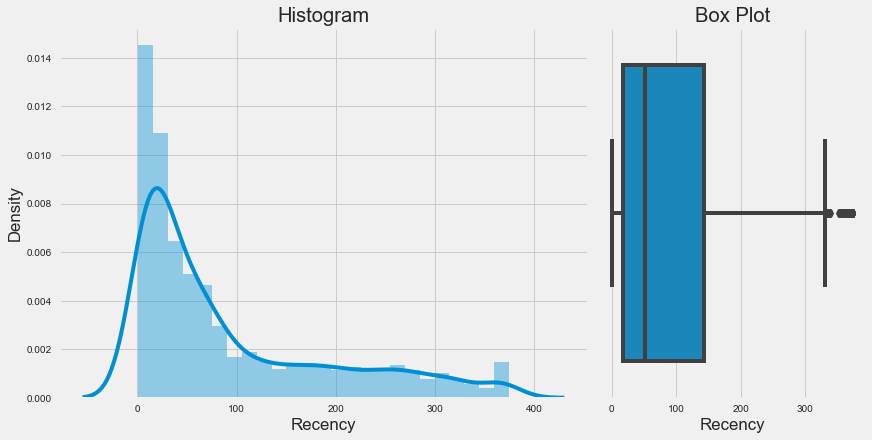

In [80]:
plotting_chart(rfm, 'Recency')

Data is skewed to the left

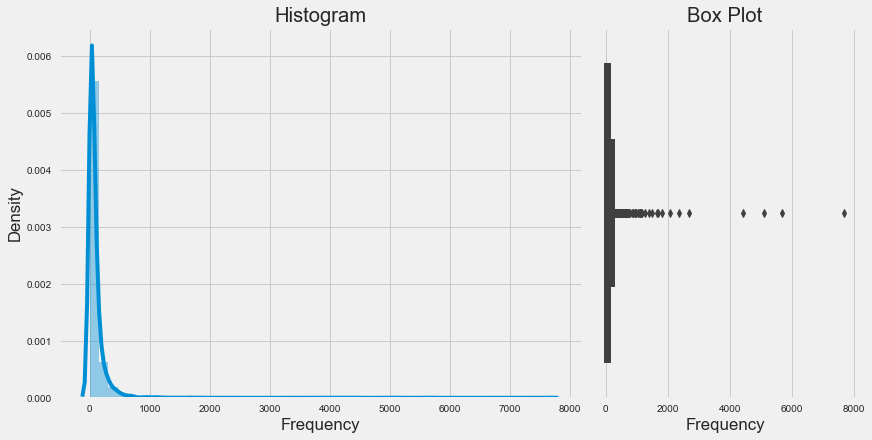

In [81]:
plotting_chart(rfm,'Frequency')

Data is skewed

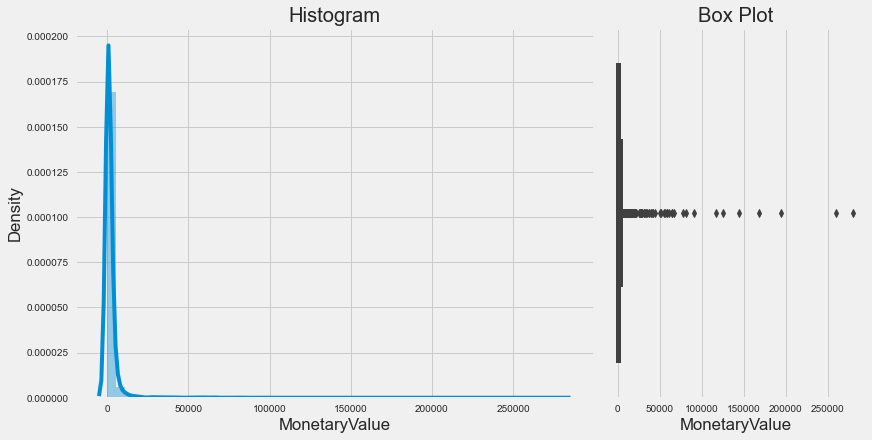

In [82]:
plotting_chart(rfm,'MonetaryValue')

Data is extremely skewed

### Handling skewness with log transformation 

log transforms the data so that it closely resembles a normal distribution

In [83]:
# unskew the data
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

In [84]:
rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,4346.000000,4346.000000,4346.000000
mean,3.770111,3.669153,6.584428
std,1.432624,1.320900,1.260586
min,0.000000,0.000000,1.322000
25%,2.890000,2.833000,5.725250
50%,3.932000,3.714000,6.502500
75%,4.963000,4.585000,7.412500
max,5.924000,8.946000,12.543000


**Looking at the changes in distribution**

Recency

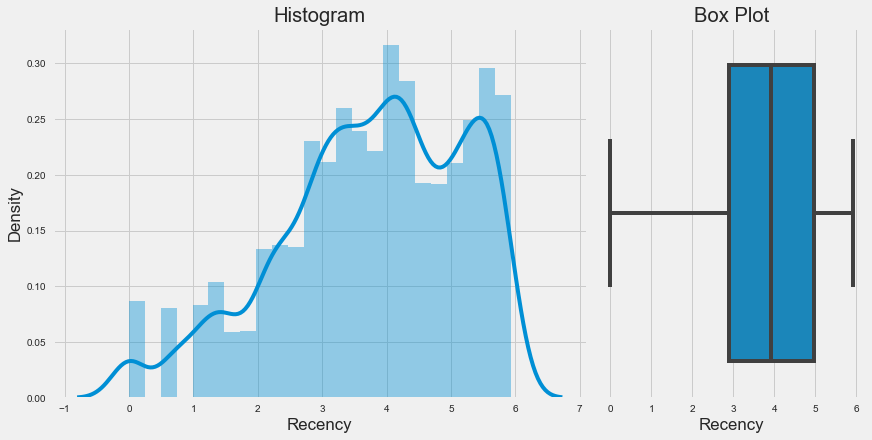

In [85]:
plotting_chart(rfm_log,'Recency')

Frequency

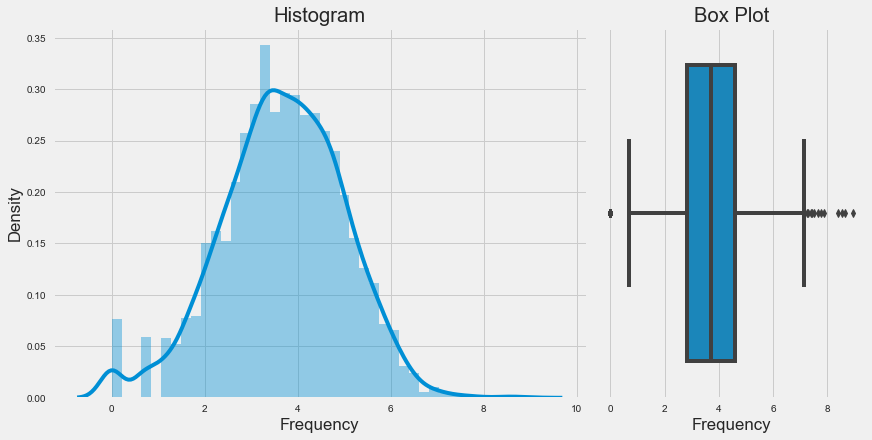

In [86]:
plotting_chart(rfm_log,'Frequency')

Monetary Value

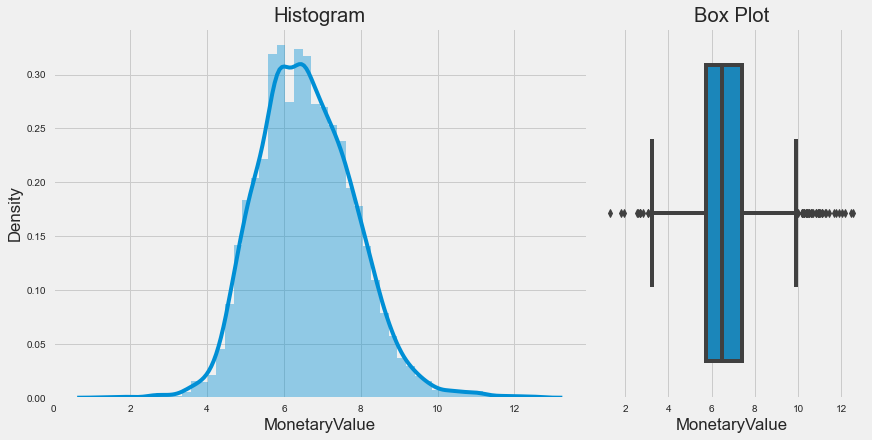

In [87]:
plotting_chart(rfm_log,'MonetaryValue')

The Distribution looks better

## K-means Clustering




Algorithms works in this manner:

- It randomly initializes the value of k as the number of clusters or n- centroids.

- Next, It allots each data points to the nearest centroid forming separate groups while relocating the center to the middle of all cluster employing euclidian distance.

- While working through the preceding steps, the algorithm checks and tries to reduce the sum of squared distances among clustered-point and middle for all clusters.

When all data points unite, repetition ends.

### Normalization of data

In [88]:
#scaling with StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_log_scaled= scaler.transform(rfm_log)

### Choosing the Value of K


finding the value of k using the elbow method

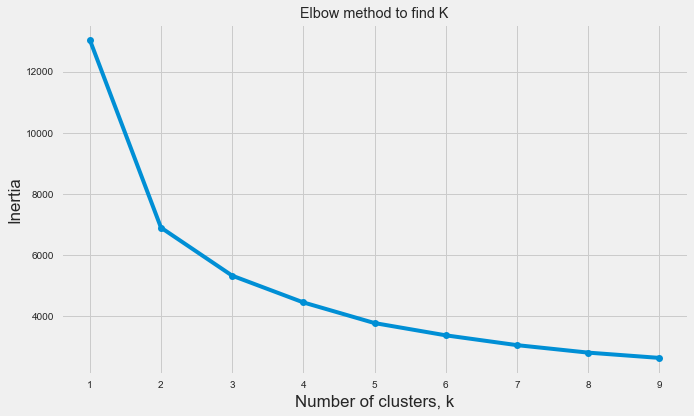

In [89]:
ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300,random_state=42)
    kc.fit(rfm_log_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Elbow method to find K')
plt.show()

The graph above is known as the elbow graph, the x-axis being the number of clusters. The best number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 3, the drop is minimal. So 3 is taken to be the number of clusters.

### Retraining model with K= 3

In [90]:
# clustering
model = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300,random_state=42)
model.fit(rfm_log_scaled)

# Assign the clusters to rfm dataframe
rfm['Clusters'] = model.labels_
rfm.head()

,,Recency,Frequency,MonetaryValue,R,F,M,RFMSegment,RFMScore,RFMLevel,Clusters
CustomerID,Country,,,,,,,,,,
12346,United Kingdom,326,1,77183.60,1,1,4,1.01.04.0,6,Silver,0
12347,Iceland,2,182,4310.00,4,4,4,4.04.04.0,12,Gold,2
12348,Finland,75,31,1797.24,2,2,4,2.02.04.0,8,Silver,0
12349,Italy,19,73,1757.55,3,3,4,3.03.04.0,10,Gold,0
12350,Norway,310,17,334.40,1,1,2,1.01.02.0,4,Bronze,1


### Evaluating the quality of clusters formed using silhouette score

Silhouette score is used to evaluate the quality of clusters created in terms of how well samples are clustered with other samples that are similar to each other. 

The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

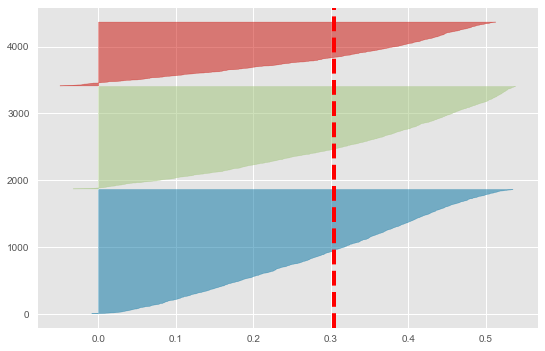

In [91]:
#Creating KMeans instance for 3 number of clusters
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
     
# Creating SilhouetteVisualizer instance with KMeans instance
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

#Fitting the visualizer
visualizer.fit(rfm_log_scaled)
plt.show()

The Silhouette score given by the graph above is 0.3.
This score indicates that the clusters are not overlapping. However, they are not well-seperated.

### Average RFM values and sizes for each clusters

In [92]:
rfm.groupby('Clusters').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
            mean      mean          mean count
Clusters                                      
0           69.0      65.0        1167.0  1859
1          171.0      15.0         294.0  1532
2           13.0     260.0        6562.0   955

### Observations



- 955 customers belong to cluster 2. These customers are recent, frequent and spend lots of money on products.
- 1532 customers belong to cluster 1. These are the least frequent, recent and low spending customers.
- 1859 customers belong to cluster 0. They are somewhat recent, frequent and spend averagely on goods

### Visualizing clusters

In [93]:

to_plot = pd.DataFrame(rfm_log_scaled, 
             columns=['Recency','Frequency','MonetaryValue'])

In [94]:
to_plot.head()

,Recency,Frequency,MonetaryValue
0,1.407991,-2.778088,3.704714
1,-2.148132,1.162104,1.415832
2,0.381784,-0.178046,0.721630
3,-0.576708,0.470072,0.704176
4,1.373086,-0.633091,-0.612824


In [95]:
x= to_plot['Recency']
y= to_plot['Frequency']
z= to_plot['MonetaryValue']

In [96]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

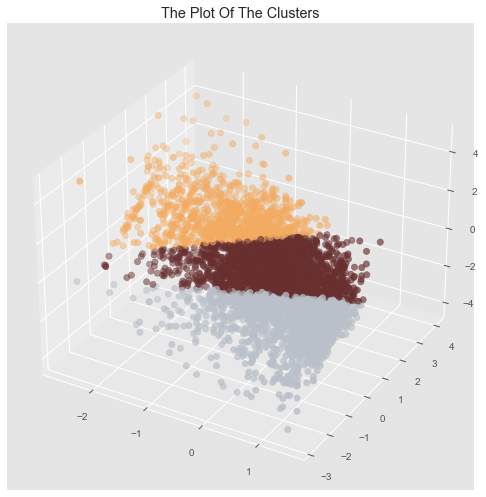

In [97]:
#Plotting the clusters
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=rfm["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

### Comparing the two segmentation methods

two kinds of segmentation have been made, RFM quantile segmentation and K-Means Segmentation . visualizing and comparing the two methods.

In [98]:
# assigning cluster column 
rfm_log_scaled = pd.DataFrame(rfm_log_scaled,index=rfm.index,columns = ['Recency','Frequency','MonetaryValue'])
rfm_log_scaled['Clusters'] = model.labels_
rfm_log_scaled['RFMLevel'] = rfm['RFMLevel']
rfm_log_scaled.reset_index(inplace = True)


In [99]:
# melting the dataframe
melted_data = pd.melt(rfm_log_scaled,id_vars=['CustomerID','RFMLevel','Clusters'],\
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Metric',value_name='Value')
melted_data.head()

,CustomerID,RFMLevel,Clusters,Metric,Value
0,12346,Silver,0,Recency,1.407991
1,12347,Gold,2,Recency,-2.148132
2,12348,Silver,0,Recency,0.381784
3,12349,Gold,0,Recency,-0.576708
4,12350,Bronze,1,Recency,1.373086


**Implementing snake plot**

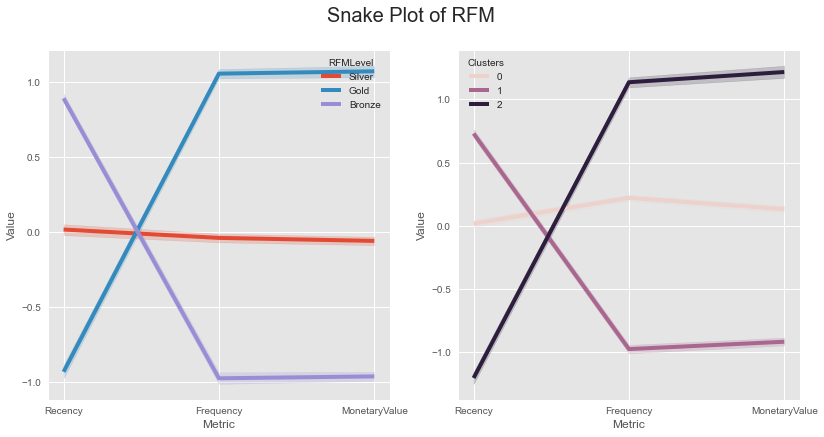

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
# snake plot of RFM
sns.lineplot(x = 'Metric', y = 'Value', hue = 'RFMLevel', data = melted_data,ax=ax1)

# snake plot of K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Clusters', data = melted_data,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=20) 
plt.show()

It seems Silver group on the left plot is similar with cluster 0 on the right plot. And the Bronze and Gold groups are  similar to clusters 1 and 2 respectively.

### Plotting relative importance using a heatmap

First the relative importance of segment attributes is calculated.

The further a **ratio** is from 0, the more important that attribute is for a segment relative to the total population


In [101]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean of the rfm groups
cluster_avg_rfm = rfm.groupby('RFMLevel').mean().iloc[:, 0:3]
prop_RFM = cluster_avg_rfm/total_avg - 1


In [102]:
# calculate the proportional gap with total mean of the clusters
cluster_avg_K = rfm.groupby('Clusters').mean().iloc[:, 0:3]
prop_K = cluster_avg_K/total_avg - 1


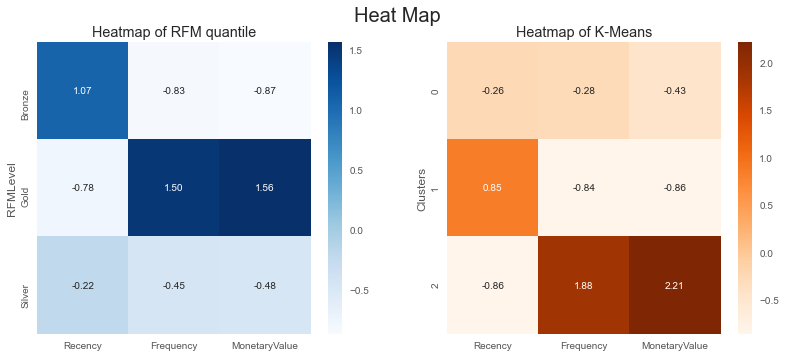

In [103]:
# heatmap of RFM
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))
sns.heatmap(data=prop_RFM, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "Heatmap of RFM quantile")

# Heatmap of K-Means
sns.heatmap(prop_K, cmap= 'Oranges', fmt= '.2f', annot = True,ax=ax2)
ax2.set(title = "Heatmap of K-Means")

plt.suptitle("Heat Map ",fontsize=20) #make title fontsize subtitle 

plt.show()

As seen from the heatmaps above:
- Silver and cluster 0 customers are sort of mainstream customers. i.e they have average values for all three metrics
- Gold and cluster 2 customers are what we can call premium customers. They are recent, frequent customers and they spend lots of money on goods
- Bronze and cluster 1 customers are not frequent neither do they spend lots of money on goods. They made their last purchase a long time ago.

## Conclusion and recommendation

| Clusters | Type of Customers | Description | Recommendation |
| :- | -: | :-: | :-: |
| 1  | Bronze | Customers with the least monetary value and least number of transactions. These customers made their last purchases long time ago. | These customers probably won’t return. The company can find out why they stopped buying or visiting|
| 0 | Silver | These customers made their last transactions a while ago. The are less frequent and spend averagely on goods | Company can improve thier purchasing experience so as to prevent them from leaving |
| 2 | Gold | These customers are the most active customers and contribute the most to the company. | Company can address them with focused advertisements and discounts. |

## Saving the model with pickle

 pickle serializes objects so they can be saved to a file, and loaded in a program again later on.


In [104]:
# loading library
import pickle

In [105]:
# creating an iterator object with write permission
with open('model.pkl', 'wb') as files:
    pickle.dump(model, files)